## 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

### Hints: 使用 [Request](https://blog.gtwang.org/programming/python-requests-module-tutorial/) 抓取資料
### Hints: [字串分割](http://www.runoob.com/python/att-string-split.html)
### Hints: 例外處理: [Try-Except](https://pydoing.blogspot.com/2011/01/python-try.html)

In [1]:
## 假如我們不想把資料載到自己的電腦裡?
# 把連結填入
target_url = 'https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt'

In [2]:
import requests
response = requests.get(target_url)
data = response.text

# 用 request 傳送回來的資料不會認得斷行符號
print(len(data))
data[0:100]

784594


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238\thttp://farm2'

In [3]:
# 找到換行符號，用該符號做字串分割後，把它拿掉
split_tag = '\n'

data = data.split(split_tag)
print(len(data))
data[0]

9996


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg'

## 將 txt 轉成 pandas dataframe

In [82]:
import pandas as pd
#coding = utf-8
arrange_data = []
print(data[0])
a = data[0].split('\t')
print(a)
for a in data:
    n = a.split('\t')
    if n[0]:
        data_dict = {'number': n[0], 'DNS': n[1]}
        arrange_data.append(data_dict)

df = pd.DataFrame(arrange_data)
df.head()

n00015388_157	http://farm1.static.flickr.com/145/430300483_21e993670c.jpg
['n00015388_157', 'http://farm1.static.flickr.com/145/430300483_21e993670c.jpg']


,DNS,number
0,http://farm1.static.flickr.com/145/430300483_2...,n00015388_157
1,http://farm2.static.flickr.com/1005/3352960681...,n00015388_238
2,http://farm1.static.flickr.com/27/51009336_a96...,n00015388_304
3,http://farm4.static.flickr.com/3025/2444687979...,n00015388_327
4,http://img100.imageshack.us/img100/3253/forres...,n00015388_355


## 讀取圖片，請讀取上面 data frame 中的前 5 張圖片

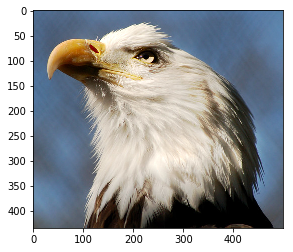

In [63]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

# 請用 df.loc[...] 得到第一筆資料的連結
first_link = df.loc[0,'DNS']

response = requests.get(first_link)
img = Image.open(BytesIO(response.content))

# Convert img to numpy array

plt.imshow(img)
plt.show()

In [83]:
def img2arr_fromURLs(url_list, resize = False):
    """
    請完成這個 Function
    Args
        - url_list: list of URLs
        - resize: bool
    Return
        - list of array
    """
    img_list = []
    for url in url_list:
        response = requests.get(url)
        try:
            img = Image.open(BytesIO(response.content))
            img_list.append(img)
        except:
            continue
        if len(img_list) == 5:
            break
    return img_list

Total images that we got: 5 


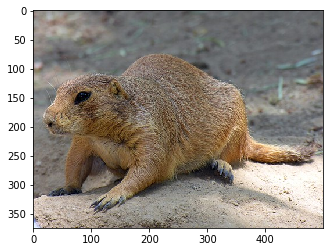

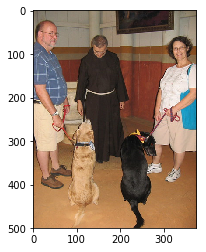

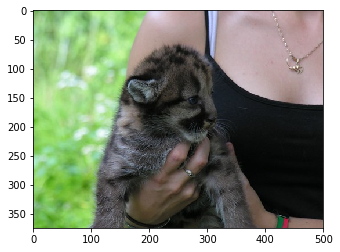

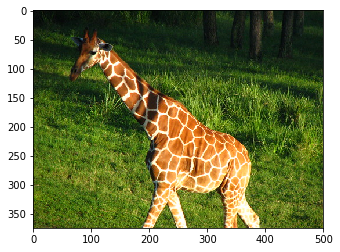

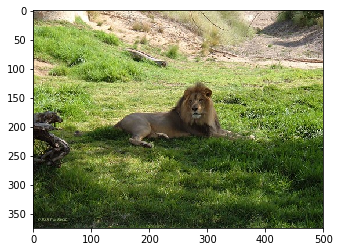

In [84]:
n = 10
result = img2arr_fromURLs(list(df.iloc[n:n+15,0]))
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉


for im_get in result:
    plt.imshow(im_get)
    plt.show()